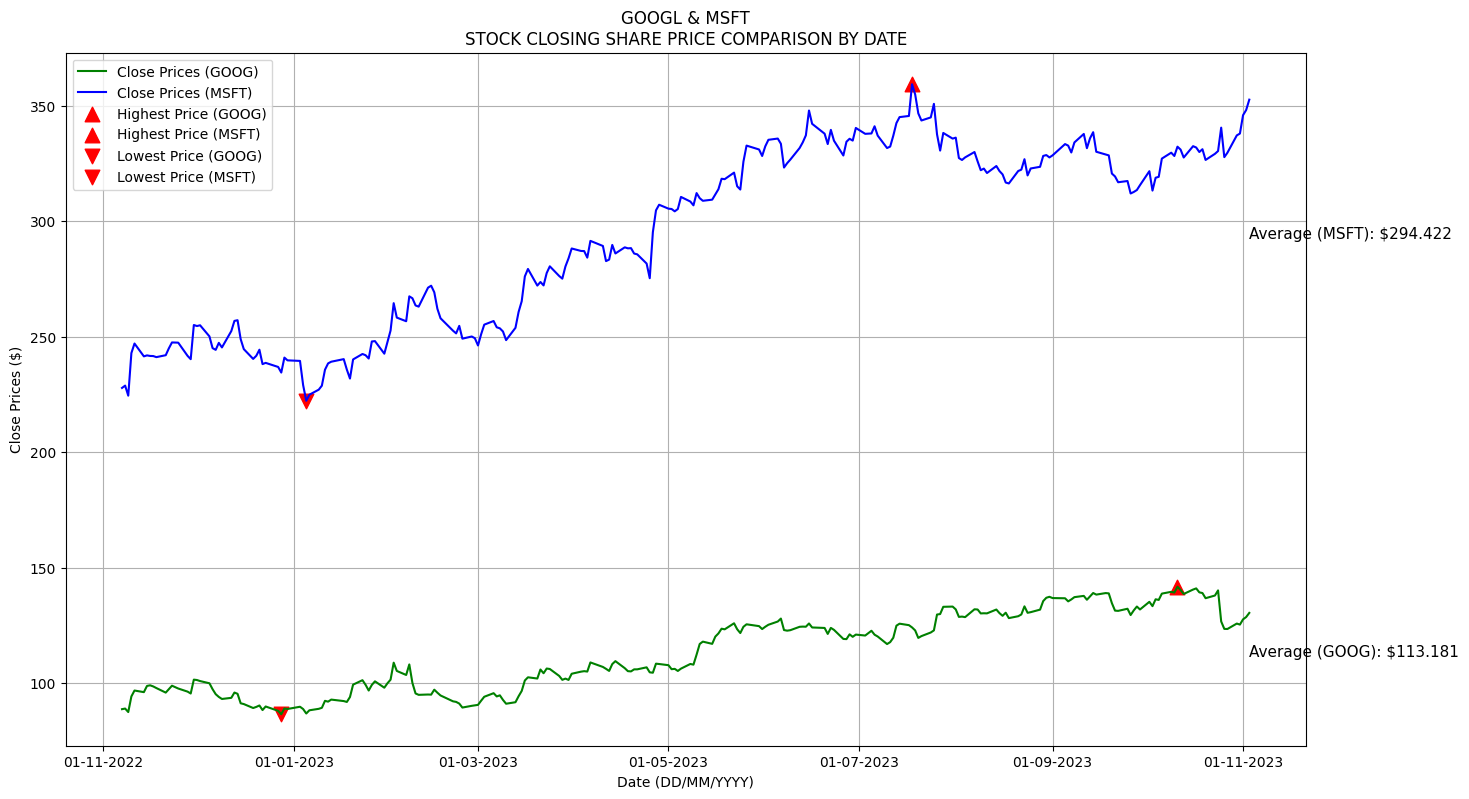

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Read the .csv files
df1 = pd.read_csv("GOOG.csv")
df2 = pd.read_csv("MSFT.csv")

# Select the columns needed
selected_data1 = df1[["Date", "Close"]]
selected_data2 = df2[["Date", "Close"]]

# Convert date columns to datetime data type
selected_data1.loc[:, "Date"] = pd.to_datetime(selected_data1["Date"])
selected_data2.loc[:, "Date"] = pd.to_datetime(selected_data2["Date"])

# Ordering by date
selected_data1 = selected_data1.sort_values(by="Date")
selected_data2 = selected_data2.sort_values(by="Date")

# Plot
fig, ax = plt.subplots(figsize=(16, 9))

# GOOGLE's dataset
ax.plot(selected_data1["Date"], selected_data1["Close"], "g-", label="Close Prices (GOOG)")

# MICROSOFT's dataset
ax.plot(selected_data2["Date"], selected_data2["Close"], "b-", label="Close Prices (MSFT)")

# Highest
max_goog = selected_data1[selected_data1["Close"] == selected_data1["Close"].max()]
max_msft = selected_data2[selected_data2["Close"] == selected_data2["Close"].max()]
ax.scatter(max_goog["Date"], max_goog["Close"], label="Highest Price (GOOG)", marker="^", color="r", s=110)
ax.scatter(max_msft["Date"], max_msft["Close"], label="Highest Price (MSFT)", marker="^", color="r", s=110)

# Lowest
min_goog = selected_data1[selected_data1["Close"] == selected_data1["Close"].min()]
min_msft = selected_data2[selected_data2["Close"] == selected_data2["Close"].min()]
ax.scatter(min_goog["Date"], min_goog["Close"], label="Lowest Price (GOOG)", marker="v", color="r",  s=110)
ax.scatter(min_msft["Date"], min_msft["Close"], label="Lowest Price (MSFT)", marker="v", color="r", s=110)

# Average
avg_close_price1 = selected_data1["Close"].mean()
avg_close_price2 = selected_data2["Close"].mean()

# Show average
ax.text(selected_data1["Date"].iloc[-1], avg_close_price1, f"Average (GOOG): ${avg_close_price1:.3f}", fontsize=10, verticalalignment="center")
ax.text(selected_data2["Date"].iloc[-1], avg_close_price2, f"Average (MSFT): ${avg_close_price2:.3f}", fontsize=10, verticalalignment="center")

ax.set_xlabel("Date (DD/MM/YYYY)")
ax.set_ylabel("Close Prices ($)")
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%Y"))
plt.title("GOOGL & MSFT\nStock Closing Share Price Comparison by Date".upper())
plt.grid(True)
plt.legend()

plt.show()
